              instance_id   duration  total_cost  resolved_by      status  \
0  astropy__astropy-12907  39.926167    0.081861            2  identified   

        gpt4o 0617  transitions  edited  planned  identified  ...  \
0  file_identified            7   False    False         1.0  ...   

   PlanToCode_cost  ClarifyCodeChange  ClarifyCodeChange_cost  EditCode  \
0          0.02436                NaN                     NaN       1.0   

   EditCode_cost  Finished  Rejected                     expected_files  \
0       0.012711       1.0       NaN  ['astropy/modeling/separable.py']   

                        edited_files  error  
0  ['astropy/modeling/separable.py']    NaN  

[1 rows x 43 columns]
['identified' 'found_in_search' 'resolved' 'edited' 'file_identified'
 'Failed']


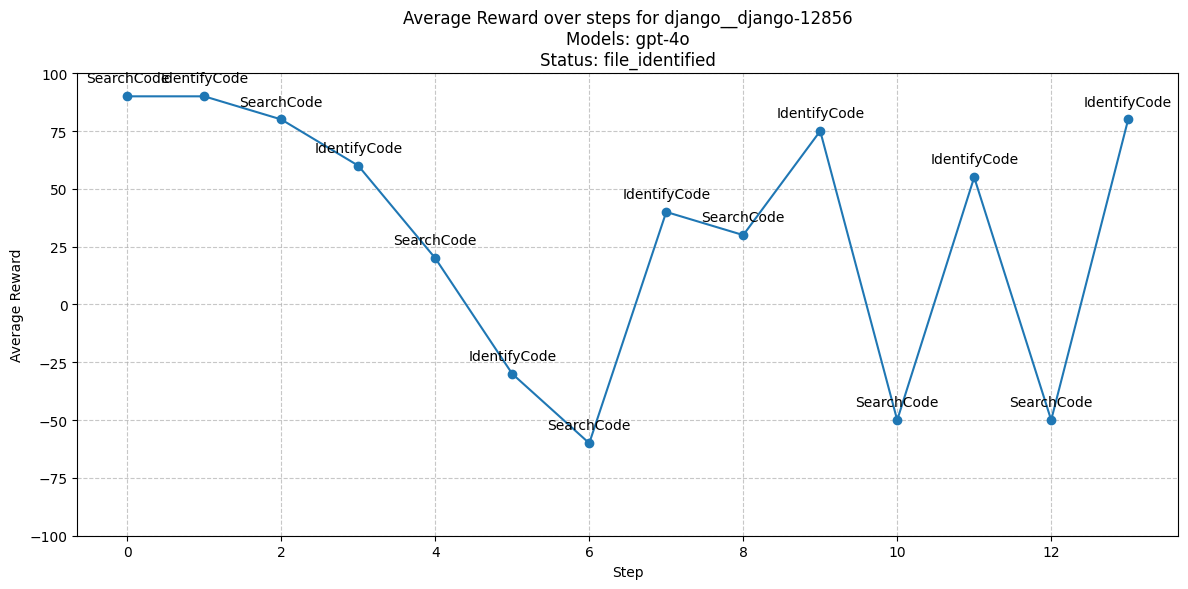


Step 6: (SearchCode) Ground Truth Error: (file_identified)
gpt-4o: The repeated searches through the same files without identifying new
relevant code spans indicate an ineffective search strategy. To implement the
check for fields in `UniqueConstraint`, the approach should shift to examining
the model validation logic or migration handling in Django's codebase, rather
than repeatedly searching the same files.

Reward: -60.0
--------------------------------------------------------------------------------


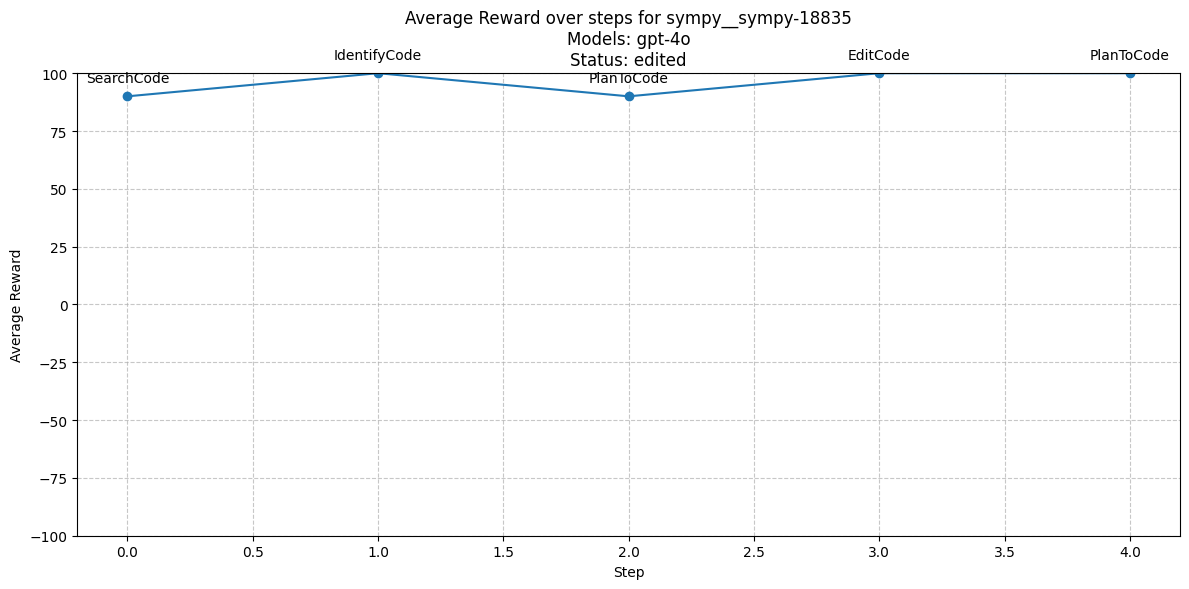


Step 0: (SearchCode) Ground Truth Error: (edited)
gpt-4o: The search for the `uniq` function was successfully executed,
identifying its location in `sympy/utilities/iterables.py`. This is a crucial
step to implement the required modification to raise a `RuntimeError` if the
size of the list changes during iteration. The process was correctly followed
without any common mistakes.

Reward: 90.0
--------------------------------------------------------------------------------


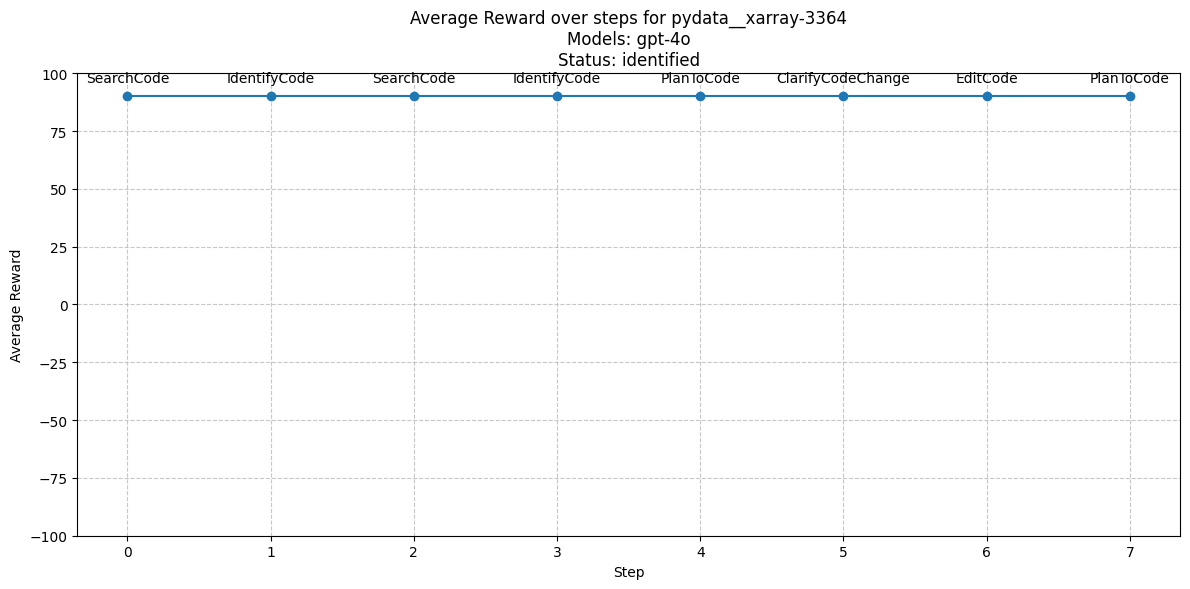


Step 0: (SearchCode) Ground Truth Error: (identified)
gpt-4o: The identified code spans for the `concat` function within the xray
library are essential for addressing the problem of concatenating datasets with
different variables. By examining these code spans, we can determine how to
modify the function to handle missing variables more gracefully, similar to the
behavior of `pd.concat`. This approach avoids the common mistake of not finding
the necessary code spans, ensuring a thorough and accurate solution.

Reward: 90.0
--------------------------------------------------------------------------------


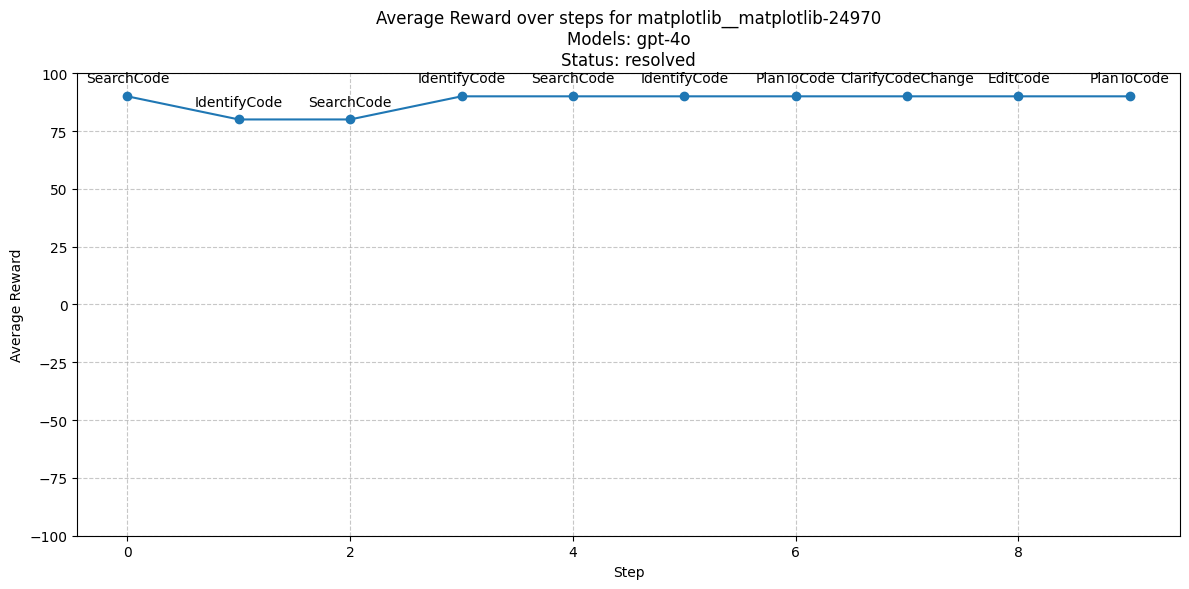


Step 1: (IdentifyCode) Ground Truth Error: (resolved)
gpt-4o: The relevant file `lib/matplotlib/colors.py` has been correctly
identified, but the specific lines causing the deprecation warnings are not
directly visible in the provided spans. Further investigation within this file
is necessary to pinpoint the exact lines causing the warnings. This approach is
logical and aligns with the need to delve deeper into the code to resolve the
issue effectively.

Reward: 80.0
--------------------------------------------------------------------------------


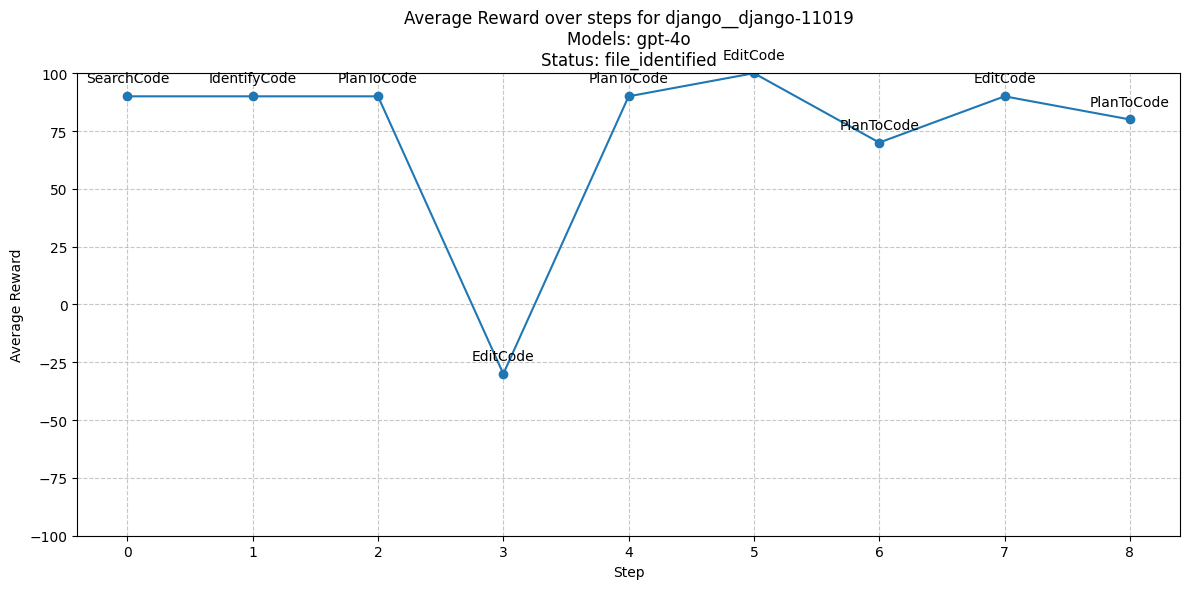


Step 3: (EditCode) Ground Truth Error: (file_identified)
gpt-4o: The proposed changes to the `merge` method in the `Media` class do not
fully address the root cause of the issue, which is the incorrect order of media
files when merged. Specifically, the solution does not ensure that `text-
editor.js` appears before `text-editor-extras.js`, which is essential for
resolving the conflict. Therefore, while the structural changes were sound, they
did not effectively solve the problem described in the initial issue.

Reward: -30.0
--------------------------------------------------------------------------------


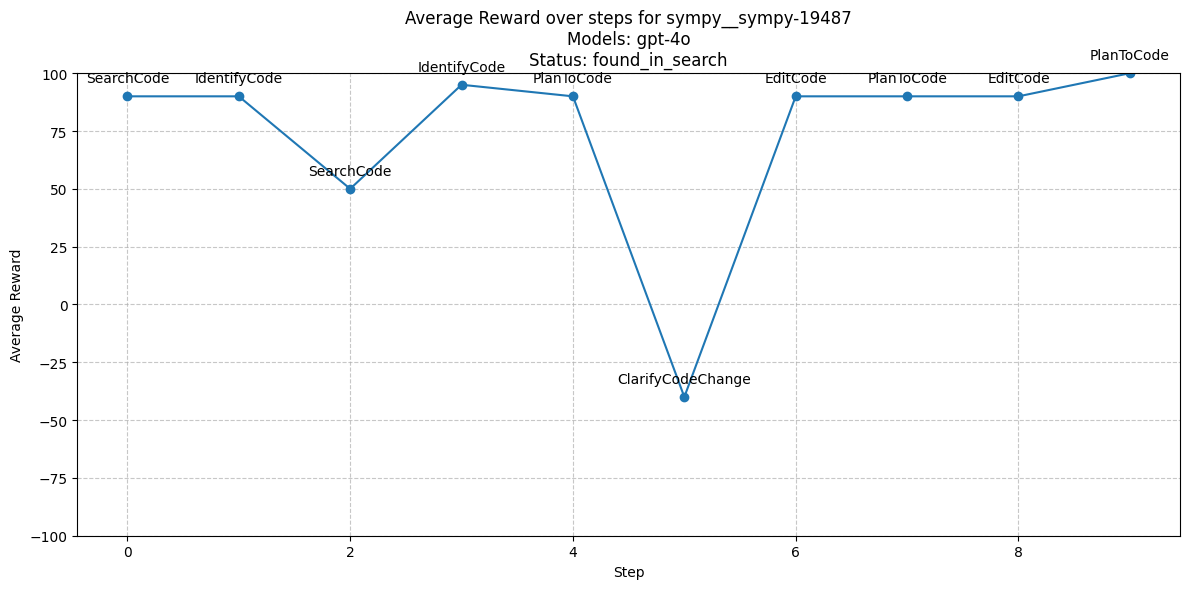


Step 5: (ClarifyCodeChange) Ground Truth Error: (found_in_search)
gpt-4o: The `_eval_rewrite_as_Abs` method already exists in the `sign` class,
making the planned addition redundant. This indicates a failure to recognize the
existing implementation, leading to unnecessary steps. Additionally, the search
in `sympy/functions/elementary/miscellaneous.py` was irrelevant, further
indicating inefficiency in the problem-solving process.

Reward: -40.0
--------------------------------------------------------------------------------


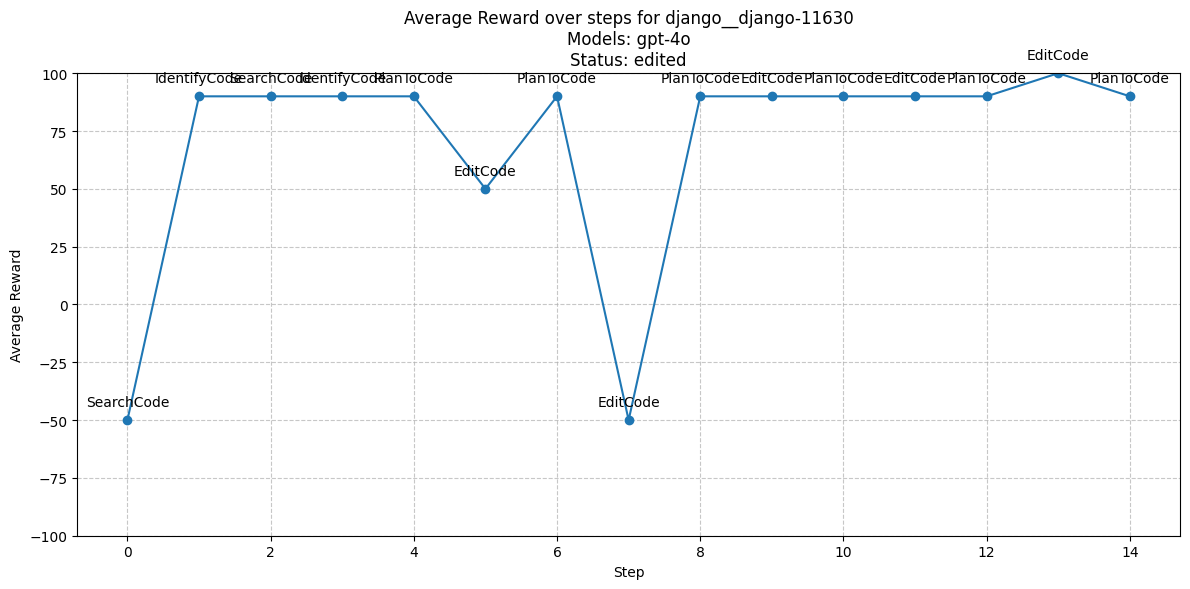


Step 0: (SearchCode) Ground Truth Error: (edited)
gpt-4o: The search for the models causing the "db_table used by multiple models"
error was ineffective because it returned code spans from Django's internal
files rather than the project's specific `models.py` files. To resolve the
issue, it's crucial to examine the `models.py` files within each app in the
project to identify and address the conflicting `db_table` names directly.

Reward: -50.0
--------------------------------------------------------------------------------


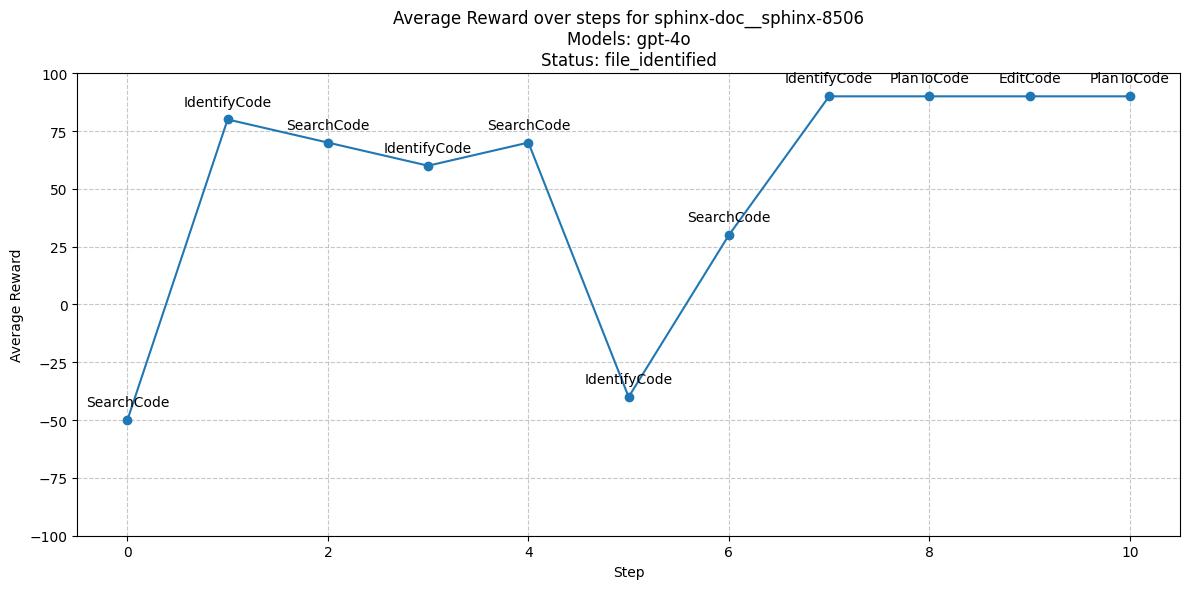


Step 0: (SearchCode) Ground Truth Error: (file_identified)
gpt-4o: The search did not successfully locate the relevant file `qemu-option-
trace.rst.inc`, which is crucial for resolving the issue with the `option::`
directive in Sphinx 3.2. The failure to find the necessary code spans is a
common mistake that obstructs further progress. To address the problem
effectively, it is essential to locate and examine the specific file where the
directive is used.

Reward: -50.0
--------------------------------------------------------------------------------


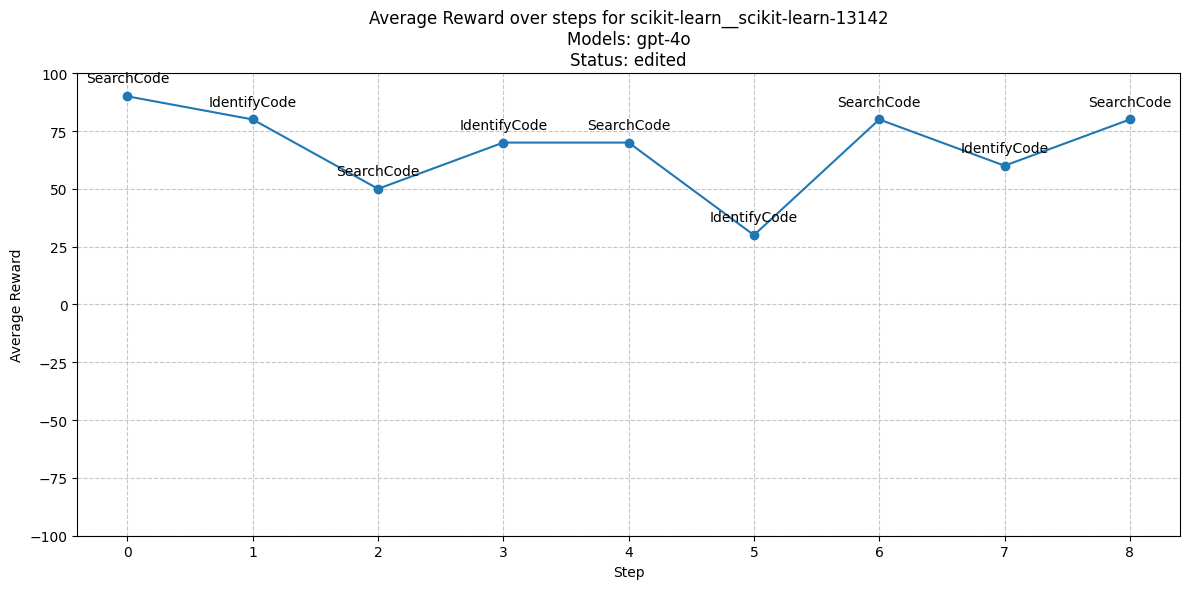


Step 5: (IdentifyCode) Ground Truth Error: (edited)
gpt-4o: The identified `predict` method in the `BaseMixture` class is relevant
for understanding the discrepancy between `fit_predict` and `predict` when
`n_init > 1`. However, the `fit_predict` method, which is equally crucial, has
not been located. This partial identification indicates progress but remains
incomplete, as it does not provide the full context needed to address the issue
comprehensively.

Reward: 30.0
--------------------------------------------------------------------------------


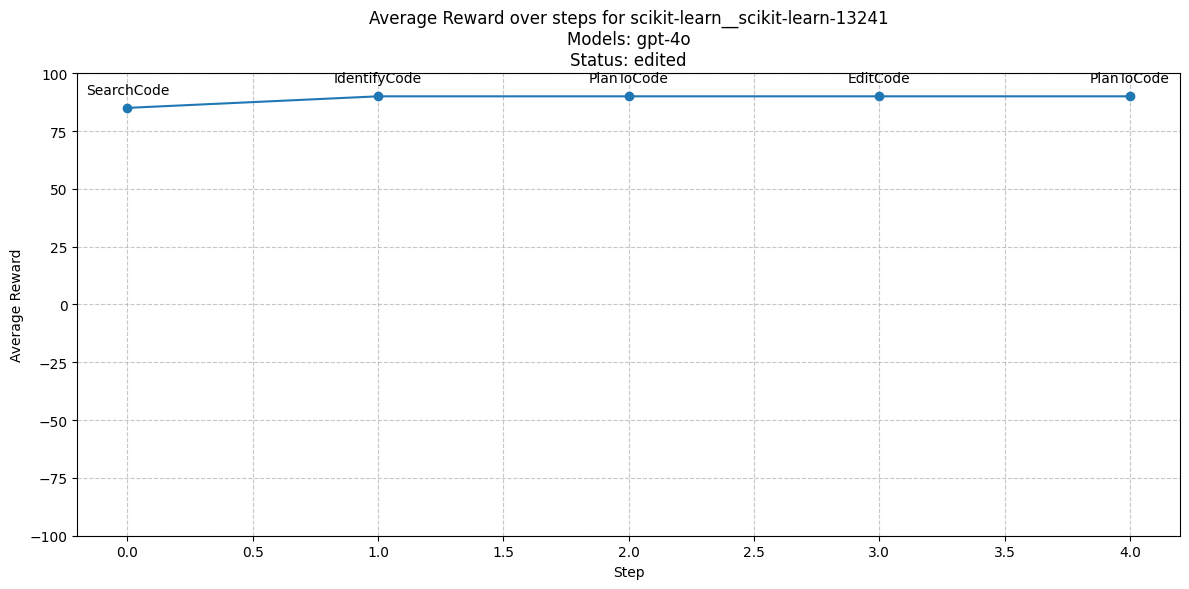


Step 0: (SearchCode) Ground Truth Error: (edited)
gpt-4o: The search state effectively identified relevant code spans related to
the `KernelPCA` class within the `sklearn/decomposition/kernel_pca.py` file.
This is a crucial step towards addressing the issue described in the problem
statement, as it allows for a deeper investigation into the implementation
details that might explain the sign differences in the results. The search was
thorough and did not exhibit any common mistakes such as failing to find
relevant code.

Reward: 85.0
--------------------------------------------------------------------------------


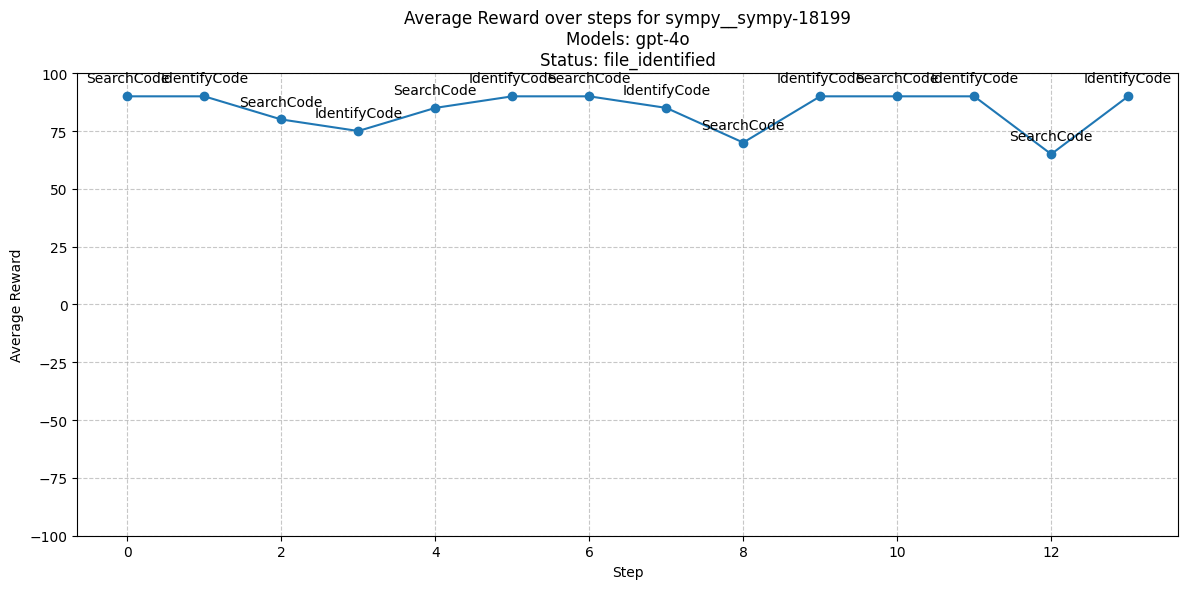


Step 12: (SearchCode) Ground Truth Error: (file_identified)
gpt-4o: The relevant functions and code spans associated with the `nthroot_mod`
function, including `_nthroot_mod1`, `is_nthpow_residue`, `sqrt_mod`,
`sqrt_mod_iter`, and `_sqrt_mod1`, have been correctly identified. However, the
search for additional functions like `_sqrt_mod_prime_power` indicates a
tendency towards over-searching, which can lead to inefficiency. The next step
should be to transition to the planning or editing stage to address the core
issue effectively.

Reward: 65.0
--------------------------------------------------------------------------------


In [7]:
import os
import re
import glob
import math
import collections
import pandas as pd
import numpy as np
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import textwrap

from moatless.search.reward import parse_value
from utils import wrap_text


rew_type = "rews_traj/prompt_2_state_file_context-True_debate-True"

# Load and parse the rewards
filename = f"/share/edc/home/antonis/moatless-tools/evaluations/20240617_moatless_gpt-4o_search_max_action_1_temp_0.2/{rew_type}/pytest-dev__pytest-5227.json"

# Modify the base_dirs and rew_models lists
base_dirs = [
    # "/share/edc/home/antonis/moatless-tools/evaluations/20240617_moatless_gpt-4o_search_max_action_1_temp_0.2",
    # "/share/edc/home/antonis/moatless-tools/evaluations/20240617_moatless_gpt-3.5-turbo_search_max_action_1_temp_0.2"
    # "/share/edc/home/antonis/moatless-tools/evaluations/20240617_moatless_gpt-4o-2024-05-13"
    "/share/edc/home/antonis/moatless-tools/evaluations/20240617_moatless_gpt-4o-eval_traj"
]

state_to_class_map = {
    "Failed": ["SearchCode"],
    "resolved": None,
    "identified": ["PlanToCode"],
    "planned": ["EditCode"],     # "PlanToCode"],
    "edited": ["EditCode"],
}    

failure_state_map = {
    "Failed": "SearchCode",
    "found_in_search": "IdentifyCode",
    "file_identified": "PlanToCode",
    "edited": "EditCode",   
}

base_dir = base_dirs[0]

results_path = "/share/edc/home/antonis/moatless-tools/evaluations/Moatless - Reported runs.xlsx"
rew_path = os.path.join(base_dir, rew_type)

rew_models = ["Qwen/Qwen2-7B-Instruct", 
              "Qwen/Qwen2-72B-Instruct", 
              "gpt-4o",
              "gpt-4o-mini",
              "deepseek/deepseek-chat"]

rew_models = [rew_models[-3]]

instances_success = ["pytest-dev__pytest-5227", "django__django-16139", "sympy__sympy-24152", 
                     "django__django-16379", "django__django-16527", "django__django-13933"]

instances_fail = ["django__django-11019", "django__django-11630", "django__django-12856",
                  "sympy__sympy-18199", "sympy__sympy-19487", "sympy__sympy-18835"]

instances = None


def read_jsonl(file_path):
    with open(file_path, 'r') as file:
        return [json.loads(line) for line in file]
    
def find_instance_names(base_dirs):
    all_instances = set()
    for filepath in glob.glob(os.path.join(base_dir, 'rews', '**', '*.json'), recursive=True):
        filename = os.path.basename(filepath)
        if filename != 'all_preds.json':
            all_instances.add(filename[:-5])  # Remove '.json' extension
    return sorted(list(all_instances))

def parse_rewards_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    
    rewards = defaultdict(list)
    
    for entry in data:
        if not isinstance(entry, dict):
            continue
        node_id = entry['node_id']
        reward = entry['output']['parsed_reward']
        rewards[node_id].append(reward)
    
    return rewards

def load_instances(base_dir, instances=None, extension='json'):
    trajs = {}
    if instances is None:
        # Load all available instances
        for filename in os.listdir(base_dir):
            if filename.endswith(f'.{extension}'):
                instance = os.path.splitext(filename)[0]
                file_path = os.path.join(base_dir, filename)
                trajs[instance] = json.load(open(file_path))
    else:
        # Load specified instances
        for instance in instances:
            filename = os.path.join(base_dir, f'{instance}.{extension}')
            trajs[instance] = json.load(open(filename))
    return trajs

def load_model_instances(base_dir, models, instances=None, extension='json'):
    trajs = {}
    for model in models:
        trajs[model] = load_instances(os.path.join(base_dir, model), instances, extension)
    return trajs

def parse_llm_response(response_dict):
    """
    Parse multiple fields from the LLM response content in dictionary format.
    
    Args:
    response_dict (dict): The dictionary containing the LLM response.
    
    Returns:
    dict: A dictionary containing parsed values for explanation, classification, error, suggestion, and reward.
    """
    parsed_data = {}
    
    # Extract the content from the response dictionary
    response_content = response_dict['outputs']
    if len(response_content) > 0:
        response_content = response_content[0]
    response_content = response_content['completion_response']['choices'][0]['message']['content'] 

    # Parse reward
    parsed_data['reward'] = response_dict['outputs'][0].get('parsed_reward')
    
    # Parse explanation
    explanation_pattern = r'<Explanation>:\s*(.*?)(?=<|$)'
    explanation_match = re.search(explanation_pattern, response_content, re.DOTALL)
    if explanation_match:
        parsed_data['explanation'] = explanation_match.group(1).strip()
    else:
        parsed_data['explanation'] = None
    
    # Parse classification, error, and suggestion
    for field in ['classification', 'error', 'suggestion']:
        parsed_data[field] = parse_value(response_content, keyword=field)
    
    return parsed_data

# Example usage:
def process_rew_list(rew_list):
    processed_rews = []
    for rew in rew_list:
        parsed_data = parse_llm_response(rew)
        processed_rews.append(parsed_data)
    return processed_rews

def create_traj_rew_dict(trajs, rews):
    full_dict = collections.defaultdict(dict)
    for instance, model_trajs in trajs.items():
        transitions = model_trajs['transitions']
        
        # Check if there are rewards for this instance
        if any(instance in model_rews for model_rews in rews.values()):
            full_dict[instance]['transitions'] = transitions
            
            for model, model_rews in rews.items():
                if instance in model_rews:
                    for transition, rew in zip(transitions, model_rews[instance]):
                        if 'reward' not in transition:
                            transition['reward'] = {}
                        
                        parsed_data = parse_llm_response(rew)
                        if parsed_data:
                            transition['reward'][model] = {
                                'parsed_reward': rew['average_reward'],
                                'parsed_fields': parsed_data
                            }
                        else:
                            transition['reward'][model] = {
                                'parsed_reward': rew["average_reward"]
                            }
    
    return full_dict

def add_llm_response(rews):
    for model, model_rews in rews.items():
        for instance, instance_rews in model_rews.items():
            for i, rew in enumerate(instance_rews):
                parsed_result = parse_llm_response(rew)
                if parsed_result:
                    instance_rews[i]['parsed_result'] = parsed_result
    return rews

def plot_reward_over_steps(traj_rews, instance, models, df, to_print=[]):
    if isinstance(models, str):
        models = [models]
    transitions = traj_rews[instance]['transitions']
    
    avg_rewards = []
    states = []
    explanations = []
    all_vars = []
    
    for transition in transitions:
        if 'reward' in transition:
            model_rewards = []
            step_explanations = []
            step_vars = {}
            
            for model in models:
                if model in transition['reward']:
                    reward_value = transition['reward'][model].get('parsed_reward', 0)
                    if isinstance(reward_value, (int, float)):
                        model_rewards.append(reward_value)
                        explanation = transition['reward'][model].get('parsed_fields', {}).get('explanation', 'No explanation available')
                        step_explanations.append(f"{model}: {explanation}")
                        
                        vars_dict = transition['reward'][model].get('parsed_fields', {})
                        for key in to_print:
                            if key in vars_dict and key != 'explanation':
                                if key not in step_vars:
                                    step_vars[key] = {}
                                step_vars[key][model] = vars_dict[key]
                    else:
                        print(f"Warning: Invalid reward value for model {model}: {reward_value}")
            
            if model_rewards:
                avg_rewards.append(np.mean(model_rewards))
                states.append(transition['name'])
                explanations.append("\n".join(step_explanations))
                all_vars.append(step_vars)
    
    steps = range(len(avg_rewards))
    
    status = df[df['instance_id'] == instance]['status'].values[0] if instance in df['instance_id'].values else 'Unknown'
    
    plt.figure(figsize=(12, 6))
    plt.plot(steps, avg_rewards, marker='o')
    for i, (step, reward, state) in enumerate(zip(steps, avg_rewards, states)):
        plt.annotate(state, (step, reward), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title(f"Average Reward over steps for {instance}\nModels: {', '.join(models)}\nStatus: {status}")
    plt.xlabel("Step")
    plt.ylabel("Average Reward")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(-100, 100)
    plt.tight_layout()
    plt.show()
    
    min_reward_index = np.argmin(avg_rewards)
    min_reward_state = states[min_reward_index]
    min_reward_explanation = explanations[min_reward_index]
    min_reward_vars = all_vars[min_reward_index]
    
    print(f"\nStep {min_reward_index}: ({min_reward_state}) Ground Truth Error: ({status})")
    print(f"{'='*80}")
    wrapped_explanation = textwrap.fill(min_reward_explanation, width=80)
    print(wrapped_explanation)
    print(f"\nReward: {avg_rewards[min_reward_index]}")
    
    if to_print:
        print("\nAdditional Variables:")
        for var_name in to_print:
            if var_name in min_reward_vars:
                print(f"{var_name}:")
                for model, value in min_reward_vars[var_name].items():
                    print(f"  {model}: {value}")
            else:
                print(f"{var_name}: Not available")


excel_data = pd.ExcelFile(results_path)
sheet_names = excel_data.sheet_names
df = pd.read_excel(results_path, sheet_name=sheet_names[-1])
df['status'] = df['status'].fillna('Failed')
print(df.head(1))
print(df['status'].unique())

rew_model_colors = plt.get_cmap('tab10')(np.linspace(0, 1, len(rew_models)))
rew_model_to_color = {rew_model: rew_model_colors[i] for i, rew_model in enumerate(rew_models)}

preds = read_jsonl(os.path.join(base_dir, 'all_preds.jsonl'))
trajs = load_instances(os.path.join(base_dir, 'trajs'), instances)
rews = load_model_instances(rew_path, rew_models, instances)

traj_rews = create_traj_rew_dict(trajs, rews)

rews = add_llm_response(rews)

# plot_reward_over_steps(trajs, 'django__django-11019', rew_models, df)

chosen_models = rew_models
for instance in rews[rew_models[0]].keys():
    for model in chosen_models:
        plot_reward_over_steps(traj_rews, instance, model, df)
        print(f"{'-'*80}")

status: file_identified
status: edited
status: file_identified
status: found_in_search
status: edited
status: file_identified
status: edited
status: edited
status: file_identified


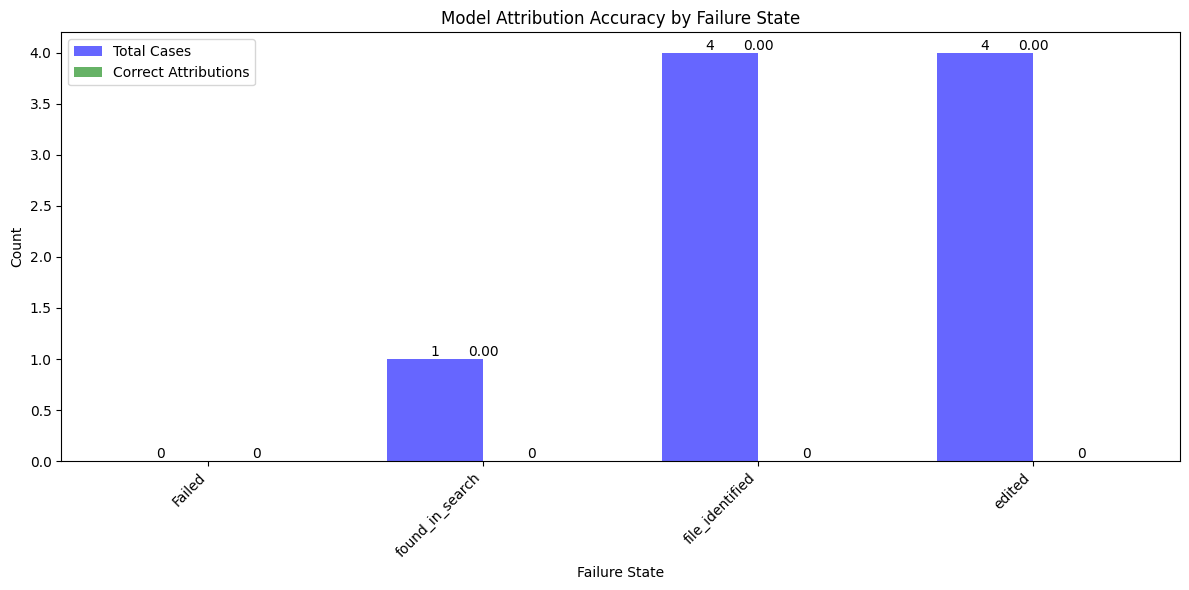

In [8]:
def plot_failure_state_attribution(traj_rews, df, model, failure_state_map):
    state_counts = {state: 0 for state in failure_state_map.keys()}
    correct_attributions = {state: 0 for state in failure_state_map.keys()}

    for instance, data in traj_rews.items():
        status = df[df['instance_id'] == instance]['status'].values[0] if instance in df['instance_id'].values else 'Unknown'
        if status in failure_state_map:
            print(f"status: {status}")
            state_counts[status] += 1
            transitions = data['transitions']
            rewards = [transition['reward'][model]['parsed_reward'] for transition in transitions if 'reward' in transition]
            
            if rewards:
                min_reward_index = np.argmin(rewards)
                min_reward_state = transitions[min_reward_index]['name']
                
                expected_min_state = failure_state_map[status]
                if min_reward_state == expected_min_state:
                    correct_attributions[status] += 1

    states = list(failure_state_map.keys())
    total_counts = [state_counts[state] for state in states]
    correct_counts = [correct_attributions[state] for state in states]

    fig, ax = plt.subplots(figsize=(12, 6))
    
    bar_width = 0.35
    index = np.arange(len(states))
    
    plt.bar(index, total_counts, bar_width, label='Total Cases', color='b', alpha=0.6)
    plt.bar(index + bar_width, correct_counts, bar_width, label='Correct Attributions', color='g', alpha=0.6)

    plt.xlabel('Failure State')
    plt.ylabel('Count')
    plt.title('Model Attribution Accuracy by Failure State')
    plt.xticks(index + bar_width/2, states, rotation=45, ha='right')
    plt.legend()

    for i, (total, correct) in enumerate(zip(total_counts, correct_counts)):
        plt.text(i, total, f'{total}', ha='center', va='bottom')
        plt.text(i + bar_width, correct, f'{correct}', ha='center', va='bottom')
        if total > 0:
            proportion = correct / total
            plt.text(i + bar_width/2, max(total, correct), f'{proportion:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig(os.path.join(rew_path, model, "proporiton_identified.png"))
    plt.show()
    
# Usage:
plot_failure_state_attribution(traj_rews, df, rew_models[0], failure_state_map)